In [65]:
from IPython.display import HTML

HTML('''
<script src='//code.jquery.com/jquery-3.3.1.min.js'></script>
<script>
code_show=true;
function code_toggle() {
if (code_show){
$('div.input').hide();
$('div .jp-CodeCell .jp-Cell-inputWrapper').hide();
} else {
$('div.input').show();
$('div .jp-CodeCell .jp-Cell-inputWrapper').show();
}
code_show = !code_show
}
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Code on/off"></form>''')

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.cluster import KMeans



# Final Project: Loan Data Analysis

Matthew Mandeli

# Abstract 

The following paper focuses on the Lending Club Loan dataset. The analysis is focusing on different measures of income (individual and average household), loan amounts, and loan grade. The three key questions answered are the following. Is there a significant difference in average income between the two most prominent loan grade groups (A and B)? What are distinct groups in terms of income level and how much one is asking to borrow for the purpose of paying medical expenses? Is there a significant difference in the mean household income for the two most prominent loan grade groups (A and B)? In order to test answer these questions two sample t-tests were implemented with an alpha level of 0.05 as well as two dimensional k-means clustering. There was found to be a significant difference in the mean income between loan groups A and B with a p-value of 0.0000. The k-means clustering produced three distinct groups with higher centroids in each group as the income level increased. There was found to be a significant difference in the mean household income between loan groups A and B with a p-value of 0.0066. Follow up analysis should be conducted to better understand how other variables such as credit score impact loan grade.

# Introduction and Background

It has been historically believed that banks give loans based on high credit ratings as it is advantageous to both parties involved (the lender and borrower). However, this seemed to not be the case building up to the financial crisis of 2008. This crisis was mainly caused by lending and borrowing issues. Specifically it was caused mortgages being issued to individuals who could not afford them. There has been back and forth regarding who is to blame regarding this decision is congress to blame for telling banks to give people on the cusp these mortgages or are the banks to blame? Regardless lending and borrowing is a vital component of our economy. The purpose of this analysis is to better understand patterns lending and borrowing and to explore commonly held notion such as the greater one’s income is the higher their loan is graded and in turn the lower interest rate they receive. This analysis is based on a dataset retrieved on Kaggle entitled Lending Club Loan Data. This is a comprehensive dataset that contains the complete loan data on all loans from 2007 to 2018 with a total of approximately 890,000 observations. This 2GB CSV file contains information on each loan request including but not limited to loan amount, interest rate, loan grade, home ownership status, annual income, issue date, and loan status. The primary objective of this analysis is see how income impacts loans. This analysis will be focuses on loan grade, individual income, household income, and loan amount. There are two type of loan grades: broad loan grades (A, etc.) and subgrades (A1,A2,A3 etc.). This analysis will be using the broad loan grades.

In order to have a better understanding of this pertinent topic the analysis will be broken down into three specific research questions. The first is regarding income and loan grade, is there a significant difference in average income between the two most prominent loan grade groups (A and B)? The second question is regarding income level and how much one is requesting to borrow, here we are wondering what are distinct groups in terms of income level and how much one is asking to borrow for the purpose of paying medical expenses? The third question is regarding the median household income and loan grade, is there a significant difference in the mean household income for the two most prominent loan grade groups (A and B)? 


# Methods

The analysis was conducted in Python using a Jupyter Notebook. The following python libraries were utilized: pandas, numpy, matplotlib, and scipy. In order to begin this analysis various columns where removed in order to reduce the size of the file. To further cut down this data set the issue date was filtered to only observations in December of 2018. This filtered dataset consisted of approximately 30,000 observations. On this cleaned dataset the remainder of the analysis was performed. In order observe if there a significant difference in average income between the two most common loan grade groups a Welch’s  t-test was run. This test is a two sample T-Test for means for unequal variances test. The loan groups A and B are used as they have the highest number of loan classifications, n=11,722 and n=11,516, respectively. For the second question evaluating income level vs how much one is requesting to borrow for the purpose of paying medical expenses, unsupervised learning is used. The K-means clustering procedure was implemented in order to partition the data into a 3 groups. The two features that are focused on annual income and loan amount. The other features evaluated (credit limit, interest rate, and number of open accounts) did not show any evidence of meaningful clustering. 
In order to answer the third question an external dataset was brought in from Kaggle containing average income information in 2018 for states by county. That dataset was then grouped by state and the mean for each state was computed. This new dataset was then merged with the lending club dataset based on state. Then was then broken down by loan grade and average household income. Loan groups A and B were again selected as the two largest groups (n=11,722 and n=11,516, respectively). A two-sample t-test was run with equal variances. 

All statistical tests are two-sided with a 0.05 level of significance. 


# Results

The mean income for grade A loans is 89,677.09 USD with a standard deviation of 114,530.76 USD for a sample size of 11,722. The mean income for grade B loans is 83,893.87 USD with a standard deviation of 74,255.21 USD for a sample size of 11,516. This is summarized in table 1 and figure 1. The assumption of normality holds for each of the two groups because of the large sample size and the application of the Central Limit Theorem (CLT). The two sample t-statistic for the difference in means between loan group A and B is 4.5751. There was found to be a significant difference in the mean income between loan groups A and B with a p-value of 0.0000. This can be seen in the summary output table 2.

Table 1. Table of Annual Income by Loan Grade

In [26]:
##Table of Annual Income by Loan Grade
data18.groupby('grade')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,11722.0,89677.085671,114530.764563,0.0,50000.0,74202.5,106000.0,9000000.0
B,11516.0,83893.866323,74255.209060,0.0,50000.0,70000.0,100000.0,3330432.0
C,9707.0,78657.384407,57900.285181,0.0,45000.0,65000.0,95000.0,1600000.0
D,5152.0,78096.571339,110789.045239,0.0,45000.0,65000.0,92000.0,6863991.0
E,2009.0,73385.156456,55831.126545,0.0,41000.0,60000.0,90000.0,800000.0
F,14.0,99654.305714,157519.443103,10000.0,40050.0,50000.0,81000.0,634592.0
G,14.0,38154.285714,19842.804437,19380.0,30000.0,34500.0,35750.0,98780.0


Figure 1. Bar Plot Annual Income by Loan Grade

Text(0.5, 1.0, 'Annual Income by Loan Grade')

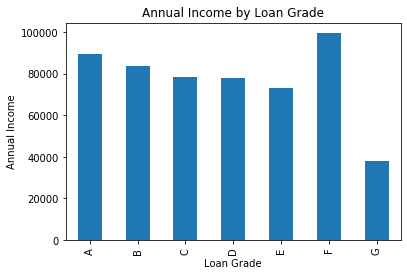

In [59]:
##Bar Plot Annual Income by Loan Grade
data18.groupby('grade').annual_inc.mean().plot(kind='bar')
plt.xlabel('Loan Grade')
plt.ylabel('Annual Income')
plt.title('Annual Income by Loan Grade')

In [28]:
##Filtering dataset into two sub-datasets with only grade A in the first and grade B in the second
A = data18[(data18['grade'] == 'A')]
B = data18[(data18['grade'] == 'B')]

Table 2. Summary Output T-test

In [29]:
##Two sample T-test of means for unequal variances 

def welch_ttest(x, y): 
    ## Welch-Satterthwaite degrees of freedom
    dof = (x.var()/x.size + y.var()/y.size)**2 / ((x.var()/x.size)**2 / (x.size-1) + (y.var()/y.size)**2 / (y.size-1))
   
    t, p = stats.ttest_ind(x, y, equal_var = False)
    
    print("\n",
          f"Welch's t-test= {t:.4f}", "\n",
          f"p-value = {p:.4f}", "\n",
          f"Welch-Satterthwaite Degrees of Freedom= {dof:.4f}")

welch_ttest(A['annual_inc'], B['annual_inc'])


 Welch's t-test= 4.5751 
 p-value = 0.0000 
 Welch-Satterthwaite Degrees of Freedom= 20143.2394


The first cluster where the annual income ranges from 0 USD to approximately 75,000 USD results in a mean loan amount of approximately 7,500 USD and has a very right skewed distribution for the loan amounts. The second cluster where the annual income ranges from greater than approximately 75,000 USD to approximately 165,000 USD results in a mean loan amount of approximately 11,000 USD and has a right skewed distribution for the loan amounts not as severe as the first cluster. The third cluster where the annual income ranges from approximately greater than 165,000 USD to approximately 375,000 USD results in a mean loan amount of approximately 19,000 USD and has an approximately normal distribution for the loan amounts. The cluser groups and there centriods can be seen in Figure 4. The intermediate producedure can be seen in figures 2 and 3.
The other features evaluated (credit limit, interest rate, and number of open accounts) did not show any evidence of meaningful clustering.


Figure 2. Plotting of Annual Income vs Loan Amount

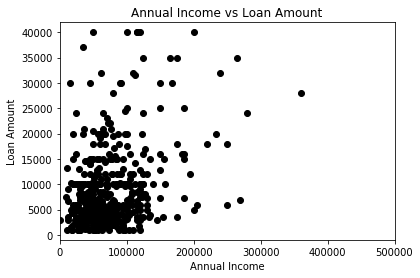

In [30]:
##Plotting of Annual Income vs Loan Amount
X=data20[["loan_amnt","annual_inc"]]
plt.scatter(X["annual_inc"],X["loan_amnt"], c="black")
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Annual Income vs Loan Amount')
plt.xlim(0, 500000)
plt.show()

Figure 3. Setting cluster number K=3

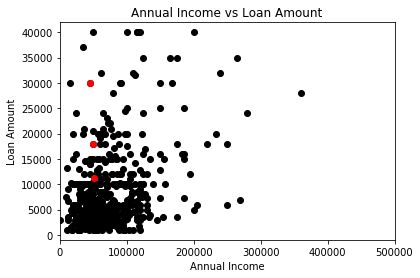

In [31]:
##Setting cluster number K=3
K=3
Centroids = (X.sample(n=K))
plt.scatter(X["annual_inc"],X["loan_amnt"], c="black")
plt.scatter(Centroids["annual_inc"],Centroids["loan_amnt"],c='red')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Annual Income vs Loan Amount')
plt.xlim(0, 500000)
plt.show()

In [32]:
##K-means clustering procedure K=3
diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["annual_inc"]-row_d["annual_inc"])**2
            d2=(row_c["loan_amnt"]-row_d["loan_amnt"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1
    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["loan_amnt","annual_inc"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['loan_amnt'] - Centroids['loan_amnt']).sum() + (Centroids_new['annual_inc'] - Centroids['annual_inc']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["loan_amnt","annual_inc"]]

/Users/matthew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/Users/matthew/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


23124.11213645189
20317.9039527547
16211.569350232156
13688.246389241212
19385.231656002044
31957.923577325753
15516.021482422395
15378.967520408209
13717.952110614442
2451.4258694917235
286.83778651678404
0.0


Figure 4. K-means Clustering K=3

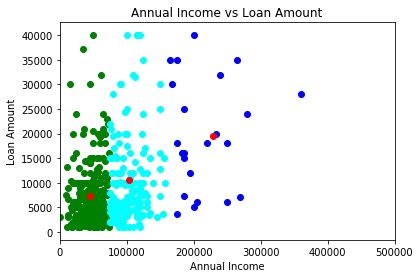

In [33]:
##Coloring and Distinguishing Groups
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["annual_inc"],data["loan_amnt"],c=color[k])
plt.scatter(Centroids["annual_inc"],Centroids["loan_amnt"],c='red')
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.title('Annual Income vs Loan Amount')
plt.xlim(0, 500000)
plt.show()

The mean household income for grade A loans is 69,066.49 USD with a standard deviation of 10,030.26 USD for a sample size of 11,722. The mean income for grade B loans is 68,709.58 USD with a standard deviation of 9,998.35 USD for a sample size of 11,516. These values can be seen in table 3. The assumption of normality holds for each of the two groups because of the large sample size and the application of the Central Limit Theorem (CLT). The assumption of equal variance also holds as the variance for grade A is 100,606,115.67 USD squared and for group B is 99,967,002.72 USD squared. The two sample t-statistic for the difference in means between loan group A and B is 2.7163. There was found to be a significant difference in the mean household income between loan groups A and B with a p-value of 0.0066. See table 4 for output summary of t-test.

Table 3. Table of Average Household Income by Loan Grade

In [34]:
##Table of Average Household Income by Loan Grade

merged.groupby('grade')['mean'].describe()

,count,mean,std,min,25%,50%,75%,max
grade,,,,,,,,
A,11722.0,69066.485246,10030.375712,48924.003115,60887.889825,65407.010435,78126.737805,90668.421875
B,11516.0,68709.577861,9998.348751,48924.003115,60354.391198,65407.010435,78126.737805,90668.421875
C,9707.0,68986.327986,10124.714430,48924.003115,60354.391198,65407.010435,78126.737805,90668.421875
D,5152.0,68933.744135,10157.626902,48924.003115,60354.391198,65407.010435,78126.737805,90668.421875
E,2009.0,68993.916248,10420.629272,48924.003115,60354.391198,65407.010435,78126.737805,90668.421875
F,14.0,69258.963997,9249.443332,52291.995968,60887.889825,71019.277932,78126.737805,78126.737805
G,14.0,68985.313111,10060.166825,56211.442953,60887.889825,65142.852675,77645.358562,89227.219718


In [35]:
##Filtering dataset into two sub-datasets with only grade A in the first and grade B in the second for merged dataset
Am = merged[(merged['grade'] == 'A')]
Bm = merged[(merged['grade'] == 'B')]

Table 4. Summary Output T-test

In [36]:
##Two sample T-test of means for equal variances
stats.ttest_ind(Am['mean'], Bm['mean'], equal_var=True)

Ttest_indResult(statistic=2.7163006548766426, pvalue=0.006606477455888224)

# Conclusion 

It was found that there was a significant difference in the mean income for loan recipients of grade A loans and loan recipients of grade B loans. This difference though statistically significant is only a difference of 5,783 USD. There is not a large difference in incomes of recipients of grade A loans and loan recipients of grade B loans. At the level of grade A and B loans which have favorable interest rates it does not appear than income describes completely the rational for which borrowers receive a grade A or B loan. Further analysis should be done on a dataset that contains credit score. 

For borrowers who are borrowing to pay medical expenses the relationship between annual income and the amount borrowed for this purpose break down into three distinct clusters. The first cluster is for moderate income, making less than 75,000USD, the mean amount of the loan is  approximately 7,500 USD. The second cluster is for middle to upper income of greater than 75,000 and less than 165,000, the mean loan amount for this group is 11,000 USD. The third cluster was for high income of greater than 165,000 USD and less 375,000 USD with a mean amount 19,000 USD. There is therefore a relationship between the mean of the loan and the income. Another interesting feature of these three clusters is they have a very different distribution for the loan amounts. The distributions for the first two clusters appear to be a skewed distribution with very long tails. This indicates that high loan amounts for medical purposes  for the moderate and middle income groups are possible but are less frequent relative to the subjects that make up that cluster.  On the other hand for the high income group the distribution for loan amounts in addition to having a higher mean, appears to be normally distributed, so higher loan amounts are more likely. 

In final analysis there was found to be a significant difference in average household income between loan grade A and B. It was statistically significant but a very small difference of 356.58 USD. Hence household income is not a main driver in determining a grade A or B loan. There are other factors in determining this. 

# Appendix

Exploratory Data Analysis

Appendix A. Mean Loan Amount by Home Ownership Status

In [41]:
##Exploritory data Analysis -- Descriptive stats based on home ownership
data18.groupby('home_ownership')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
home_ownership,,,,,,,,
ANY,113.0,14620.132743,9559.522096,1000.0,8000.0,12000.0,20000.0,40000.0
MORTGAGE,19803.0,17511.438923,10619.851856,1000.0,10000.0,15000.0,25000.0,40000.0
OWN,4402.0,14545.218083,9543.539672,1000.0,7112.5,12000.0,20000.0,40000.0
RENT,15816.0,14250.374621,9575.998563,1000.0,7000.0,11950.0,20000.0,40000.0


Text(0.5, 1.0, 'Mean Loan Amount by Home Ownership Status')

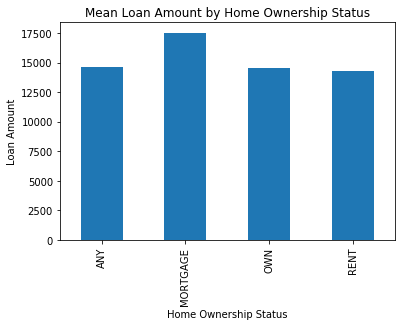

In [42]:
data18.groupby('home_ownership').loan_amnt.mean().plot(kind='bar')
plt.xlabel('Home Ownership Status')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount by Home Ownership Status')

Appendix B. Mean Loan Amount by Loan Purpose

In [43]:
data18.groupby('purpose')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
car,332.0,10775.150602,8362.252664,1000.0,5000.0,8000.0,14425.0,40000.0
credit_card,10604.0,15559.817050,9695.993179,1000.0,8500.0,13000.0,20000.0,40000.0
debt_consolidation,22156.0,17204.636442,10161.034098,1000.0,10000.0,15000.0,24000.0,40000.0
home_improvement,2281.0,14901.063130,10564.059327,1000.0,6000.0,12000.0,20000.0,40000.0
house,287.0,15691.114983,10863.793332,1000.0,6775.0,13000.0,24000.0,40000.0
major_purchase,739.0,12607.374831,10900.206113,1000.0,5000.0,10000.0,17000.0,40000.0
medical,460.0,9041.793478,7960.192989,1000.0,3500.0,6000.0,11400.0,40000.0
moving,218.0,10137.729358,9307.752591,1000.0,4000.0,7000.0,12000.0,40000.0
other,2400.0,10626.302083,9656.051797,1000.0,3500.0,7200.0,15000.0,40000.0


Text(0.5, 1.0, 'Mean Loan Amount by Loan Purpose')

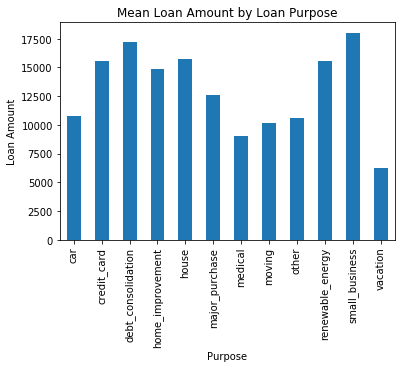

In [61]:
data18.groupby('purpose').loan_amnt.mean().plot(kind='bar')
plt.xlabel('Purpose')
plt.ylabel('Loan Amount')
plt.title('Mean Loan Amount by Loan Purpose')

Appendix C. Mean Income by Loan Status

In [45]:
data18.groupby('loan_status')['annual_inc'].describe()


,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,2.0,36000.000000,26870.057685,17000.0,26500.0,36000.0,45500.0,55000.0
Current,39087.0,83006.356585,89815.767428,0.0,48000.0,70000.0,100000.0,9000000.0
Fully Paid,823.0,85116.571738,75701.561874,0.0,50000.0,70000.0,100000.0,1100000.0
In Grace Period,111.0,87807.522523,58455.744552,16000.0,55500.0,79000.0,100000.0,430000.0
Late (16-30 days),54.0,72364.814815,42922.418637,15000.0,40250.0,60000.0,100000.0,200000.0
Late (31-120 days),57.0,75626.228070,49952.508171,6048.0,49200.0,65000.0,96000.0,234000.0


Text(0.5, 1.0, 'Mean Income by Loan Status')

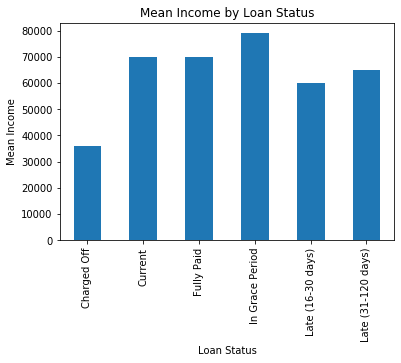

In [62]:
data18.groupby('loan_status').annual_inc.median().plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Mean Income')
plt.title('Mean Income by Loan Status')

Appendix D. Mean Income by Loan Purpose

In [47]:
data18.groupby('purpose')['annual_inc'].describe()

,count,mean,std,min,25%,50%,75%,max
purpose,,,,,,,,
car,332.0,78960.331325,48915.041057,1.0,45000.0,68000.0,99999.25,325000.0
credit_card,10604.0,82376.392155,105759.937667,0.0,48000.0,69000.0,98604.00,9000000.0
debt_consolidation,22156.0,82568.292398,87741.499935,0.0,48000.0,69000.0,100000.00,6863991.0
home_improvement,2281.0,96221.107001,69807.758868,0.0,55000.0,80000.0,118000.00,800000.0
house,287.0,85539.833101,64903.069513,1100.0,50000.0,72000.0,100000.00,704000.0
major_purchase,739.0,86562.372124,67457.283234,0.0,50000.0,74000.0,100000.00,750000.0
medical,460.0,74366.460935,51745.791726,0.0,41900.0,61000.0,95000.00,550000.0
moving,218.0,76967.712339,60995.386302,0.0,45000.0,65750.0,92075.00,725000.0
other,2400.0,77783.172225,63172.015268,0.0,43000.0,62400.0,93000.00,889000.0


In [37]:
##Loading of Dataset loan.csv
data1=pd.read_csv("./Documents/Data_Science_I/Assignments/Final/loan.csv")

In [38]:
##Show all Columns
pd.set_option('display.max_columns', 999)

In [48]:
##Filtering by Medical Purpose
data20=data18.loc[data18['purpose']=='medical']

In [40]:
##Removing Unnecessary Variables
data18 = data18.drop(["settlement_term", "settlement_percentage", "settlement_amount","settlement_date",
                   "settlement_status","debt_settlement_flag_date","debt_settlement_flag","disbursement_method",
                  "hardship_last_payment_amount","hardship_payoff_balance_amount","orig_projected_additional_accrued_interest",
                  "hardship_loan_status", "hardship_dpd","hardship_length","payment_plan_start_date",
                  "hardship_end_date", "hardship_start_date","hardship_amount","deferral_term","hardship_status",
                  "hardship_reason","hardship_type","hardship_flag","sec_app_mths_since_last_major_derog","sec_app_collections_12_mths_ex_med",
                  "sec_app_chargeoff_within_12_mths"], axis=1)

In [39]:
##Filtering Dataset by Issue Date December of 2018
data18=data1.loc[data1['issue_d']=='Dec-2018']

In [50]:
##Loading External Dataset
datat=pd.read_csv("./Documents/Data_Science_I/Assignments/Final/TEST1.csv")

In [52]:
##Mean Household Income for State
avghis=datat.groupby('State_ab')['Mean'].describe()


In [53]:
##Merging on State
merged=pd.merge(data18, avghis, left_on="addr_state", right_on="State_ab")

In [64]:
##Show all Columns
pd.set_option('display.max_columns', 999)


git hub repo:https://github.com/matthewm725/Final_Project.git